In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/df.csv',parse_dates=['date'], date_format='%Y-%m-%d %H:%M:%S')
df.set_index('date', inplace=True)
df.head(10)

,puls,RR_skurczowe,RR_rozkurczowe,saturacja_prc,CVP_srednie,odd_wymuszane,odd_calkowite
date,,,,,,,
2023-11-13 14:00:00,125.0,65.0,40.0,100.0,23.0,25.0,25.0
2023-11-13 15:00:00,130.0,90.0,50.0,100.0,20.0,25.0,25.0
2023-11-13 16:00:00,145.0,60.0,35.0,98.0,17.0,25.0,25.0
2023-11-13 17:00:00,140.0,55.0,45.0,97.0,18.0,25.0,25.0
2023-11-13 18:00:00,140.0,70.0,45.0,97.0,18.0,25.0,25.0
2023-11-13 18:30:00,140.0,75.0,50.0,NaN,20.0,NaN,NaN
2023-11-13 19:00:00,NaN,NaN,NaN,96.0,NaN,25.0,25.0
2023-11-13 20:00:00,135.0,75.0,40.0,95.0,17.0,25.0,25.0
2023-11-13 21:00:00,140.0,70.0,45.0,96.0,18.0,25.0,25.0


In [3]:
df_interpolated = df.interpolate(method='linear')
df_interpolated.head(10)

,puls,RR_skurczowe,RR_rozkurczowe,saturacja_prc,CVP_srednie,odd_wymuszane,odd_calkowite
date,,,,,,,
2023-11-13 14:00:00,125.0,65.0,40.0,100.0,23.0,25.0,25.0
2023-11-13 15:00:00,130.0,90.0,50.0,100.0,20.0,25.0,25.0
2023-11-13 16:00:00,145.0,60.0,35.0,98.0,17.0,25.0,25.0
2023-11-13 17:00:00,140.0,55.0,45.0,97.0,18.0,25.0,25.0
2023-11-13 18:00:00,140.0,70.0,45.0,97.0,18.0,25.0,25.0
2023-11-13 18:30:00,140.0,75.0,50.0,96.5,20.0,25.0,25.0
2023-11-13 19:00:00,137.5,75.0,45.0,96.0,18.5,25.0,25.0
2023-11-13 20:00:00,135.0,75.0,40.0,95.0,17.0,25.0,25.0
2023-11-13 21:00:00,140.0,70.0,45.0,96.0,18.0,25.0,25.0


In [4]:
df_interpolated.to_csv('../data/df_linearly_interpolated.csv', index=True)

In [5]:
# # jak sparsowałam 'date' jako data a nie str przy pd.read_csv na początku skryptu to nie jest to potrzebne
# x_ticks_locs = []
# x_ticks_labels = []
# days = df.index.str[0:10]
# for i, day in enumerate(days):
#     if day not in x_ticks_labels:
#         x_ticks_labels.append(day)
#         x_ticks_locs.append(i)

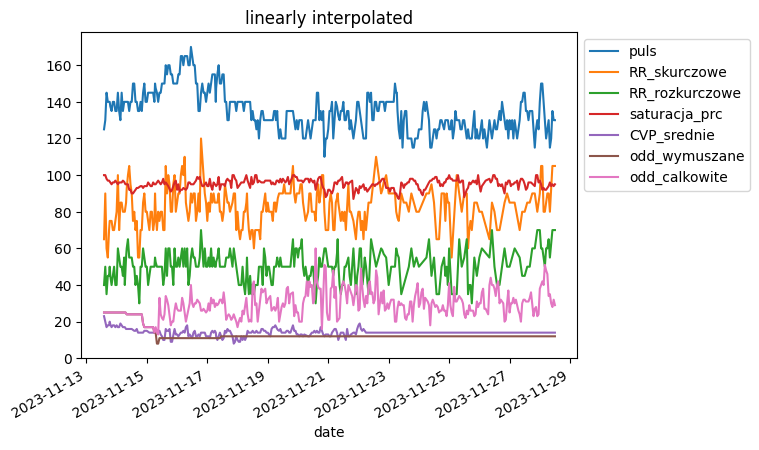

In [6]:
# plt.plot(df_interpolated.index, df_interpolated, label=df_interpolated.columns)
df_interpolated.plot(title='linearly interpolated')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
# plt.xticks(ticks=x_ticks_locs, labels=x_ticks_labels, rotation = 90)
plt.show()

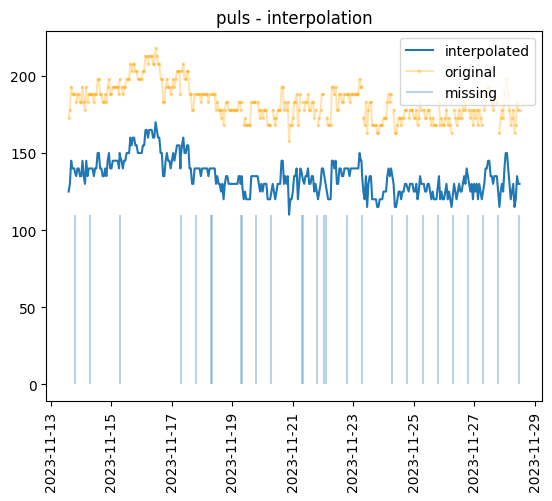

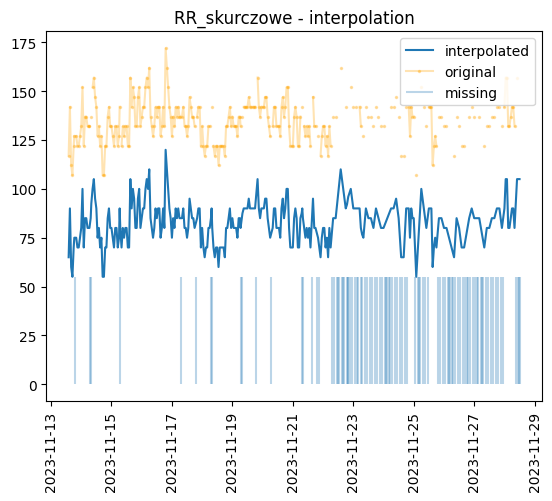

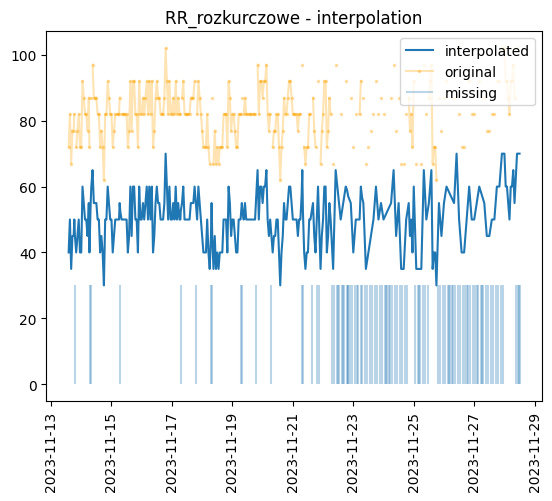

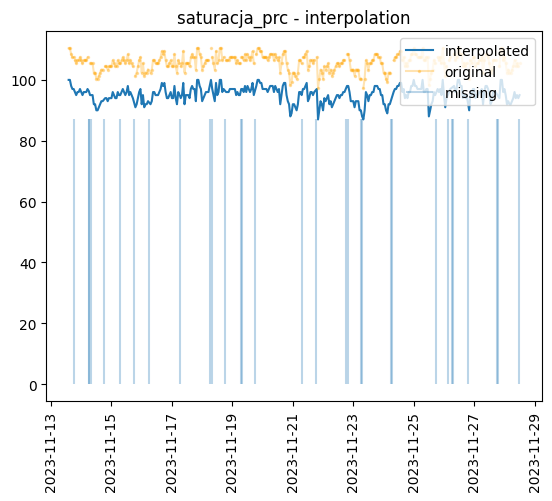

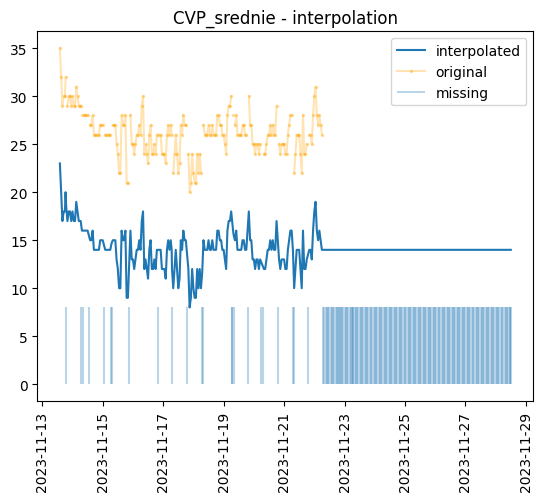

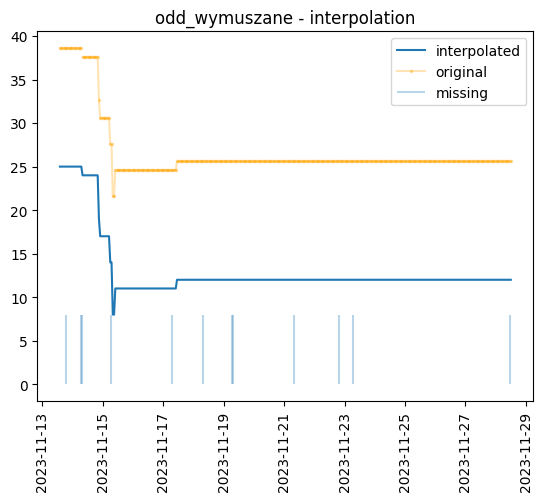

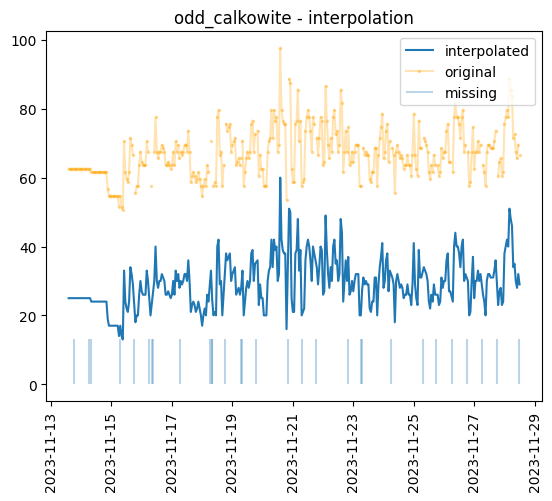

In [7]:
#better
for param in df.columns:
    missing_values_loc = df[param].isna()
    
    plt.plot(df_interpolated[param], label='interpolated')
    plt.plot(df[param] + (max(df[param]) - min(df[param])) * .8, alpha=.3, color='orange', marker='.', markersize=3, label='original')

    missing_values_loc = df[param].isna()
    missing_values_dates = df.index[missing_values_loc]
    plt.vlines(missing_values_dates,
               ymin=0,
               ymax=min(df[param]),
               linestyle="-", alpha=.3, label = 'missing')
    
    # plt.xticks(ticks=x_ticks_locs, labels=x_ticks_labels, rotation = 90)
    plt.xticks(rotation=90)
    plt.title(param + ' - interpolation')
    plt.legend(loc='upper right')
    plt.show()